# Zomato Analysis

## Importing the libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("zomato.csv")

In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
data = data.drop(['url','address','phone','menu_item',
       'listed_in(type)', 'listed_in(city)'],axis=1)

In [8]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [9]:
data.shape

(51717, 11)

In [10]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
dtype: int64

## Data cleaning

In [11]:
feature_na = [i for i in data.columns if data[i].isnull().sum() > 0]
feature_na

['rate',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [12]:
for i in feature_na:
    print(f"{i} has {np.round((data[i].isnull().sum()/len(data[i])*100),4)}% null values")

rate has 15.0337% null values
location has 0.0406% null values
rest_type has 0.4389% null values
dish_liked has 54.2916% null values
cuisines has 0.087% null values
approx_cost(for two people) has 0.669% null values


In [13]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
data.dropna(subset=['rate'],axis=0,inplace=True)

In [15]:
def split(x):
    return x.split('/')[0].strip()

In [16]:
data['rate'] = data['rate'].apply(split)

In [17]:
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: object

In [18]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [19]:
data['rate'].replace(['NEW','-'],0,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43942 non-null  object
 1   online_order                 43942 non-null  object
 2   book_table                   43942 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        43942 non-null  int64 
 5   location                     43942 non-null  object
 6   rest_type                    43791 non-null  object
 7   dish_liked                   23609 non-null  object
 8   cuisines                     43931 non-null  object
 9   approx_cost(for two people)  43690 non-null  object
 10  reviews_list                 43942 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [21]:
data['rate'] = data['rate'].astype(float)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43791 non-null  object 
 7   dish_liked                   23609 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
 10  reviews_list                 43942 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


## calculate avg rating for each restaurant

In [23]:
rating = pd.pivot_table(data,index='name',values='rate')
rating

,rate
name,
#FeelTheROLL,3.400000
#L-81 Cafe,3.900000
#refuel,3.700000
1000 B.C,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...
i-Bar - The Park Bangalore,3.800000
iFruit Live Ice Creams,3.400000
iSpice Resto Cafe,3.700000


In [24]:
rating=rating.sort_values(['rate'],ascending=False)
rating[0:15]

,rate
name,
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Asia Kitchen By Mainland China,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
Flechazo,4.800000
O.G. Variar & Sons,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


In [29]:
plt.figure(figsize=(15,8))
sns.barplot(rating[0:20].rate,rating[0:20].index,orient="h")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x800 with 0 Axes>

We can see that the top resturants have the highest number of average ratings

## distribution of ratings

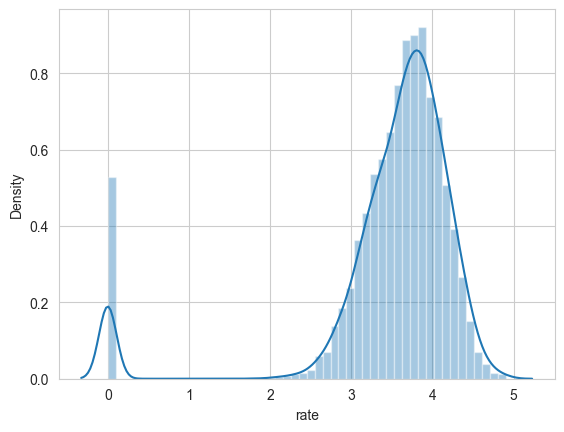

In [27]:
sns.set_style('whitegrid')
sns.distplot(data['rate'])

plt.show()

This is not a normal distibution as we can see a spike in '0's i.e the new resturants

In [27]:
from scipy.stats import normaltest

DataToTest = data['rate']

stat,p = normaltest(DataToTest)

print("stat=%0.2f,p=%0.30f" % (stat,p))

if p>0.05:
    print("Normal distribution")
else:
    print("Not a normal distribution")

stat=24555.12,p=0.000000000000000000000000000000
Not a normal distribution


## top restaurant chains

In [28]:
data['name'].value_counts()

Cafe Coffee Day             89
Onesta                      85
Empire Restaurant           71
Kanti Sweets                68
Just Bake                   68
                            ..
Taiyvan's                    1
Kitchens@Mahadevpura         1
Indian Chulha                1
CHAATter Box                 1
Katriguppe Donne Biryani     1
Name: name, Length: 7162, dtype: int64

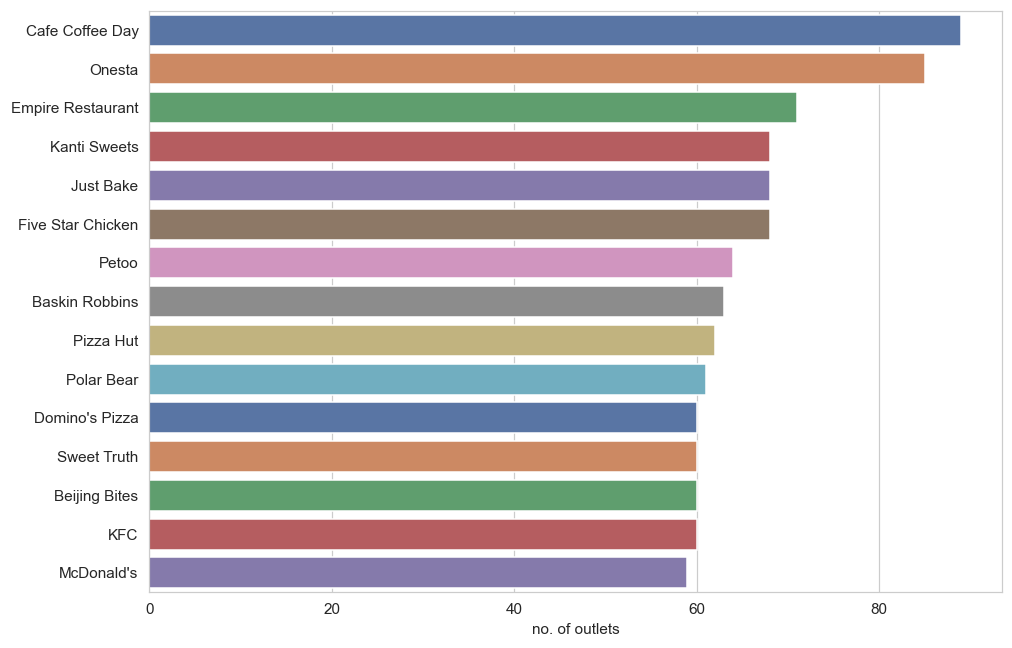

In [29]:
plt.figure(figsize=(10,7),dpi=110)

chains = data['name'].value_counts()[0:15]

sns.barplot(chains,chains.index,palette='deep')
plt.xlabel("no. of outlets")

plt.show()

These are the top resturant chains...'cafe coffee day' being at the top


## how many restaurants don't accept online orders

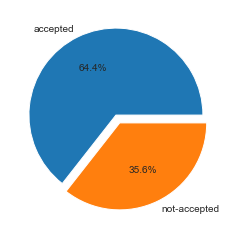

In [30]:
x = data.online_order.value_counts()
labels = ['accepted','not-accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

we see that around 64.4% of resturants accept online orders

## How many resturants had TABLE BOOKINGS?

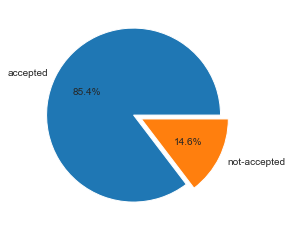

In [31]:
x = data.book_table.value_counts()
labels = ['accepted','not-accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

we observe that around 85,4% resturants have table bookings

## analysis on type of restaurants

In [33]:
data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [34]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [35]:
len(data.rest_type.unique())

88

In [36]:
data.rest_type.value_counts()

Quick Bites                  15073
Casual Dining                 9923
Cafe                          3527
Dessert Parlor                1939
Delivery                      1791
                             ...  
Bakery, Beverage Shop            2
Cafe, Food Court                 2
Dessert Parlor, Kiosk            2
Food Court, Beverage Shop        2
Quick Bites, Kiosk               1
Name: rest_type, Length: 87, dtype: int64

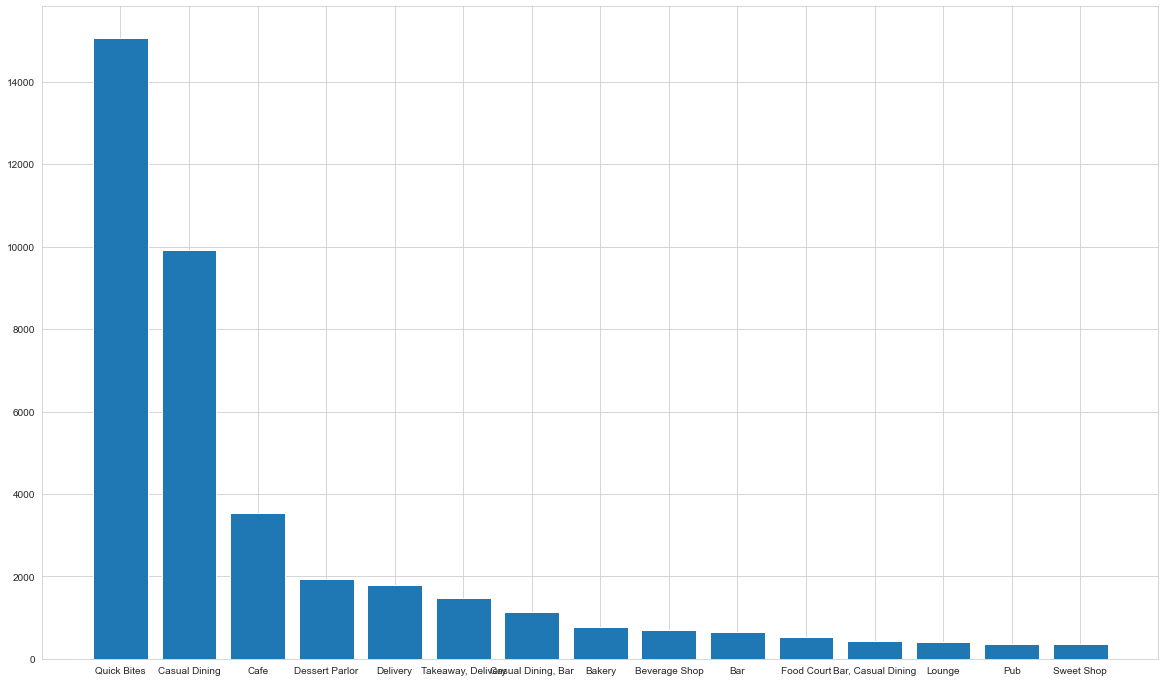

In [37]:
plt.figure(figsize=(20,12))
rest_typ = data.rest_type.value_counts()[0:15]
plt.bar(rest_typ.index,rest_typ)

plt.show()




This is the distribution of type of resturants and we observe that Quick bites at the top...further this is the dataset of banglore city 
so most of the people living there prefer quick bites(fast food chains)

## which restaurant had the highest voting? (means count of rating given)

In [38]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [39]:
voting = data.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


In [40]:
voting['votes'].describe()

count     7162.000000
mean       201.484245
std        607.015608
min          0.000000
25%         10.400000
50%         38.750000
75%        146.797414
max      16588.500000
Name: votes, dtype: float64

In [41]:
high_vot = voting[voting['votes'] >5000]

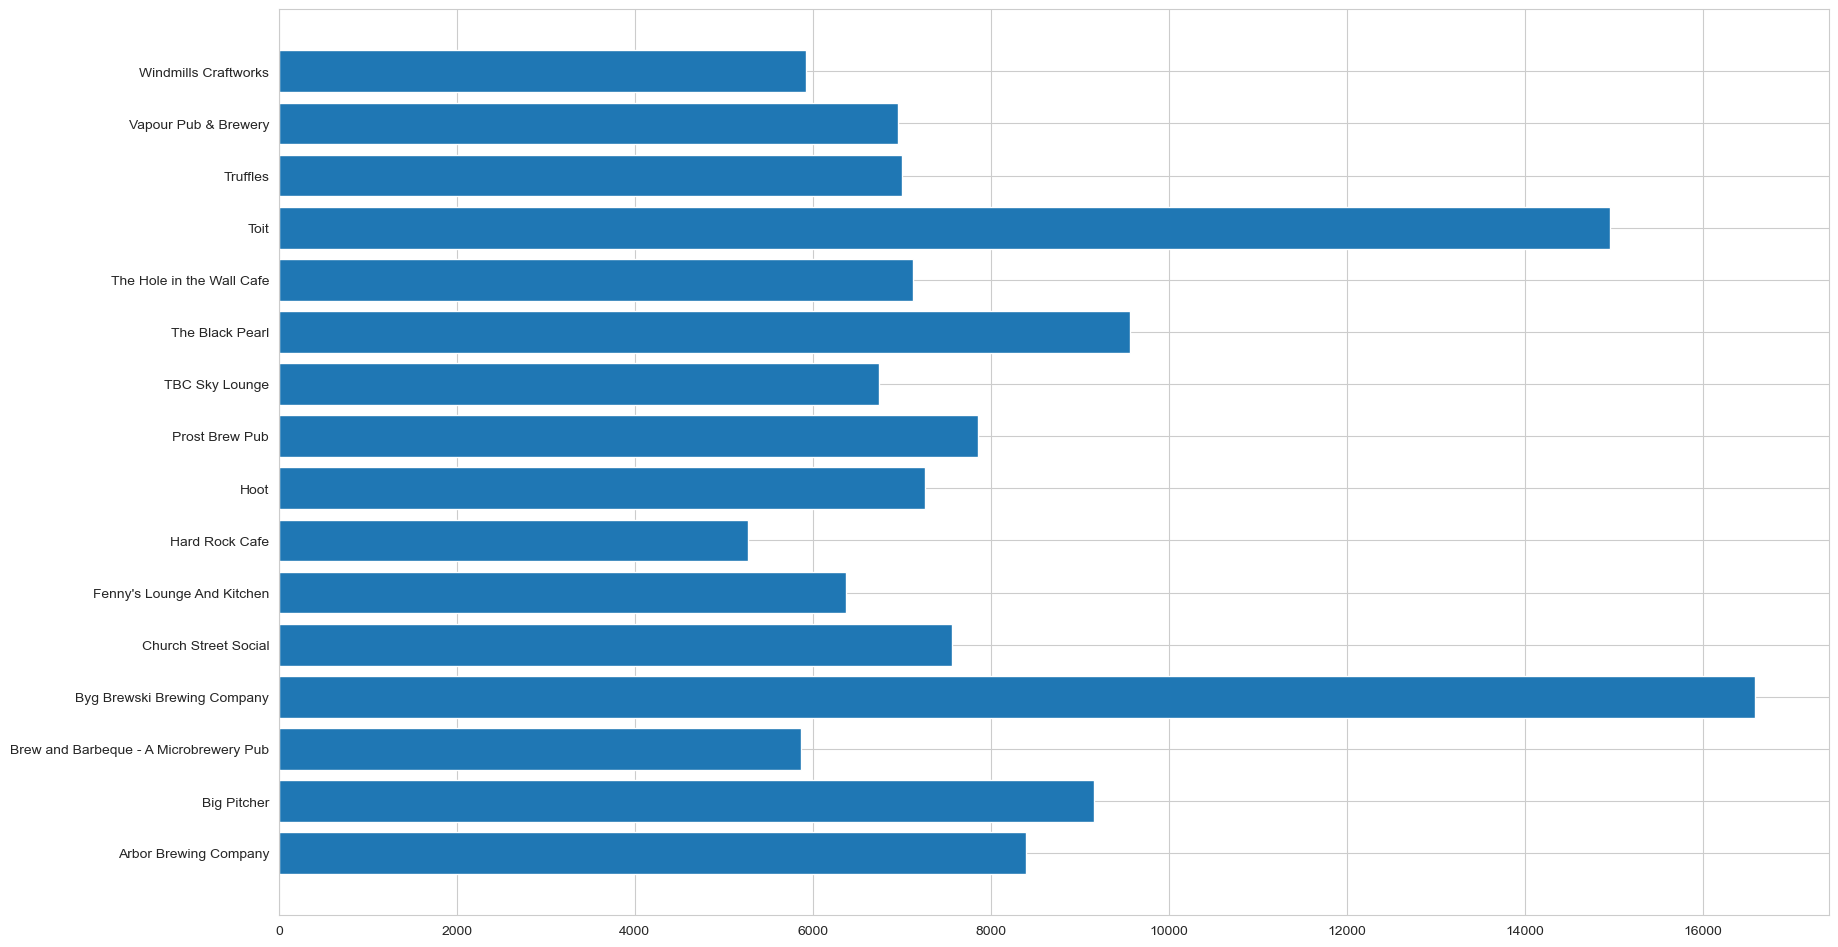

In [42]:
plt.figure(figsize=(20,12),dpi=100)

plt.barh(high_vot.index,high_vot['votes'])

plt.show()

This is the barplot for count of ratings given by consumers to a particular resturant

### Let's analyse the highly rated restaurants and worst restaurants based on number of ratings given

In [43]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."


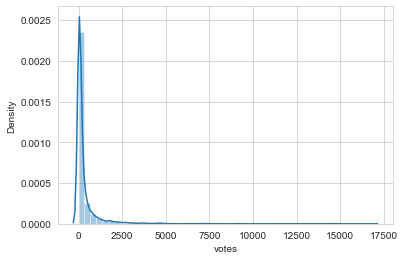

In [44]:
sns.distplot(data['votes'])

plt.show()

In [45]:
voting_rating = data.groupby('name')[['votes']].mean().sort_values('votes',ascending=False)
voting_rating

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
...,...
NutriFit,0.000000
Cross Roads Inn,0.000000
Crown Resto,0.000000


In [46]:
voting_rating['name'] = voting_rating.index

In [47]:
voting_rating = voting_rating.reset_index(drop=True)

voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


In [48]:
voting_rating = pd.merge(voting_rating,data[['rate','name']])
voting_rating

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9
...,...,...,...
43937,0.0,Lazzet Lee,0.0
43938,0.0,Lazzet Lee,0.0
43939,0.0,Lazzet Lee,0.0
43940,0.0,Lazzet Lee,0.0


In [49]:
vote_top = voting_rating[voting_rating['votes'] > 5000]
vote_top.head()

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


In [50]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
vote_top

,rate
name,
Byg Brewski Brewing Company,4.900000
The Black Pearl,4.727778
TBC Sky Lounge,4.700000
Toit,4.700000
Big Pitcher,4.650000
Brew and Barbeque - A Microbrewery Pub,4.620000
The Hole in the Wall Cafe,4.600000
Windmills Craftworks,4.600000
Truffles,4.595349


### highest Rated based on most number of votes

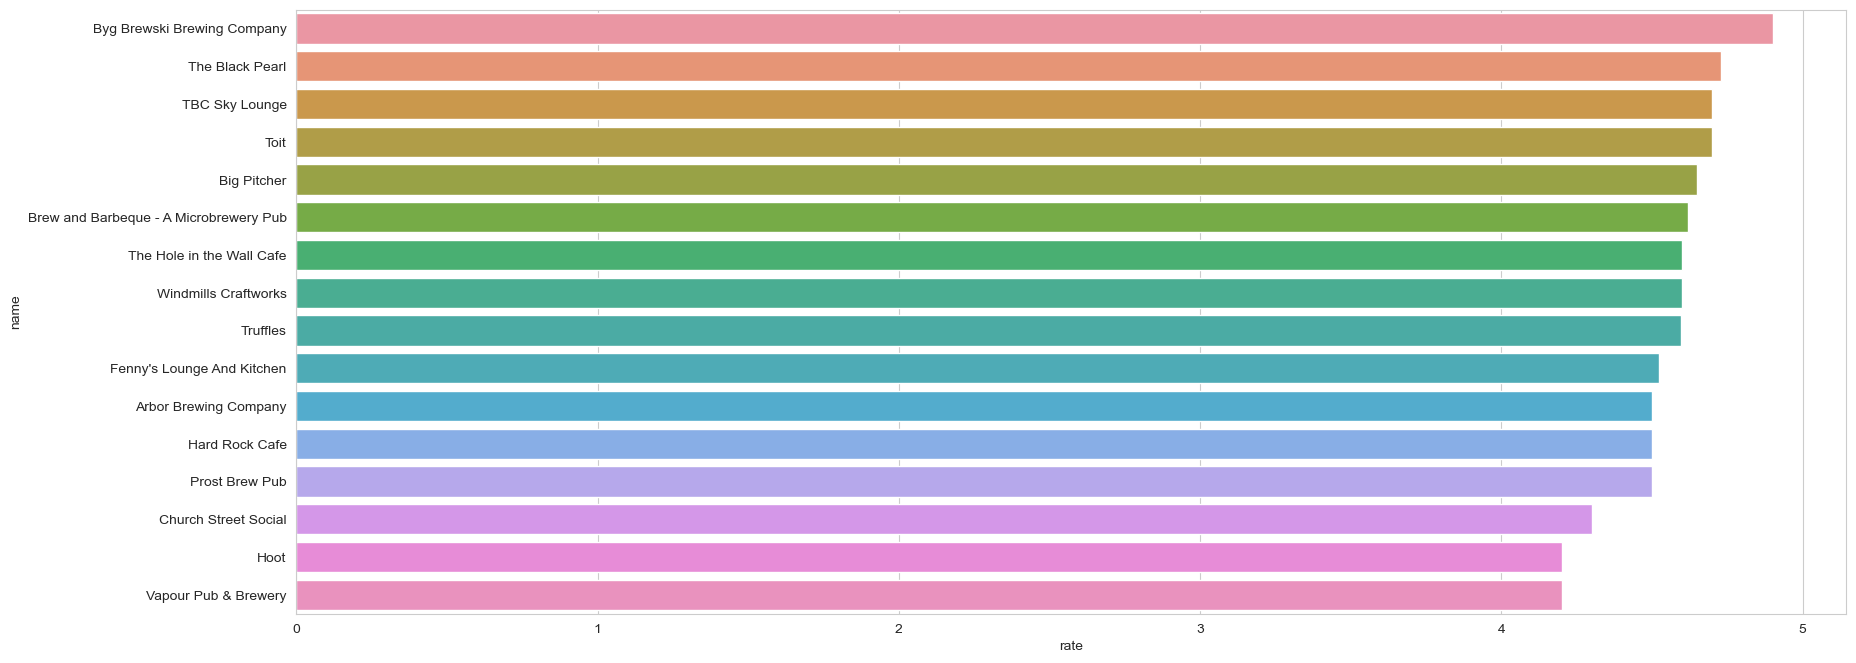

In [51]:
plt.figure(figsize=(20,8),dpi=100)

sns.barplot(vote_top['rate'],vote_top.index,orient='h')

plt.show()

'Byg Brewski Brewing Company' is the most voted resturant with the average rating of 4.9

In [52]:
bad_count = voting_rating[(voting_rating['rate'] < 3) & (voting_rating['rate'] > 0)]
bad_count

,votes,name,rate
3725,967.681818,Kritunga Restaurant,2.6
3726,967.681818,Kritunga Restaurant,2.9
3727,967.681818,Kritunga Restaurant,2.9
3742,967.681818,Kritunga Restaurant,2.7
3743,967.681818,Kritunga Restaurant,2.7
...,...,...,...
42110,4.000000,Special Biriyani,2.9
42111,4.000000,Special Biriyani,2.9
42198,4.000000,Sandesh Restaurant,2.9
42311,2.500000,Kushi Meals,2.8


In [53]:
bad_resturants = bad_count[bad_count['votes'] > 500].groupby('name')[['rate']].mean()
bad_resturants

,rate
name,
Anjappar,2.833333
FreshMenu,2.800000
Kabab Magic,2.900000
Kritunga Restaurant,2.760000
Lakeview Milkbar,2.900000
Lazeez,2.600000
Moriz Restaurant,2.775000
Savoury Restaurant,2.900000
Smoke - The Sizzler House,2.800000


### worst restaurants based on highest number of votes given

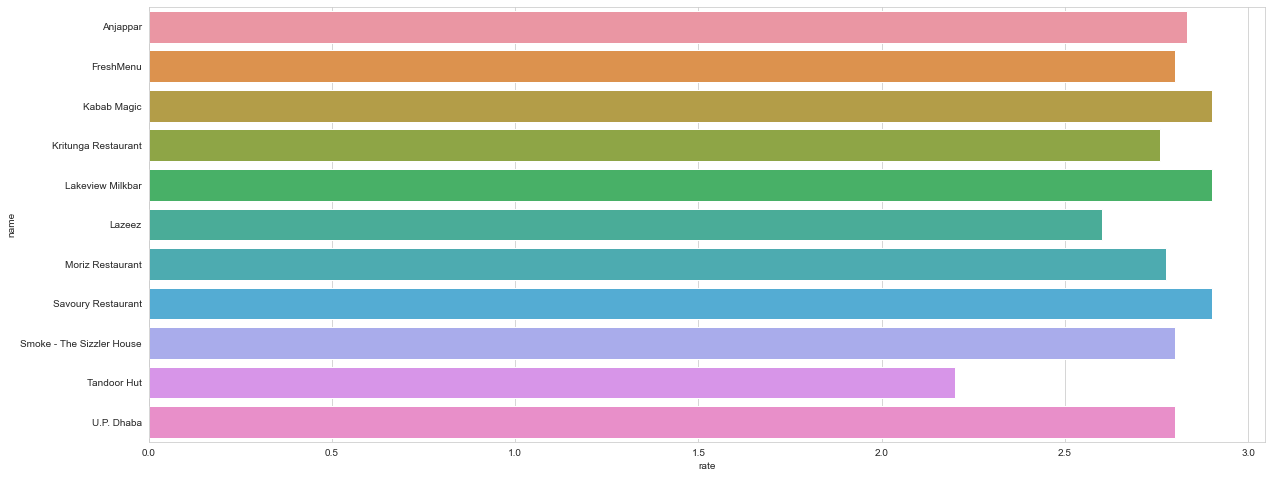

In [54]:
plt.figure(figsize=(20,8))

sns.barplot(bad_resturants['rate'],bad_resturants.index)

plt.show()

These resturants have good votes given by the consumer but less rating..which means there is something wrong with these resturants

# location in which we have highest number of restaurants

In [ ]:
data.head()

In [55]:
location_restro = data[['location']].value_counts()[0:20]
location_restro

location             
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Sarjapur Road             919
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   836
Banashankari              805
dtype: int64

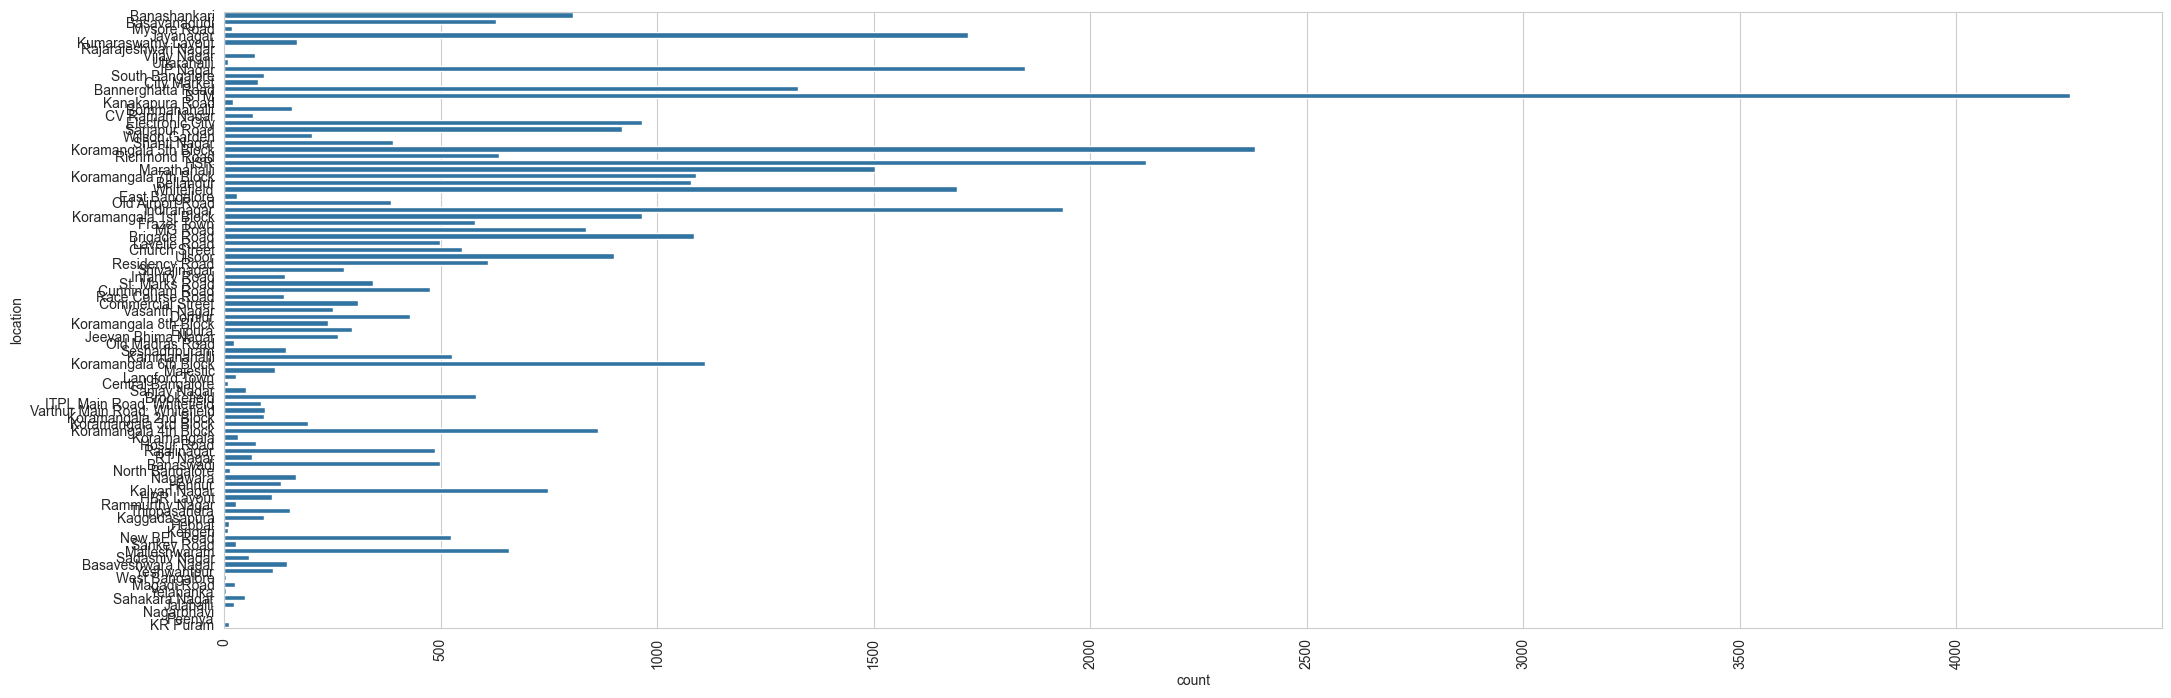

In [28]:
plt.figure(figsize=(25,8))
sns.countplot(data['location'])

plt.xticks(rotation=90)

plt.show()

Barplot of number of resturants in any location

# Identify the top 10 cuisines

In [57]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [58]:
data.rest_type.value_counts()

Quick Bites                  15073
Casual Dining                 9923
Cafe                          3527
Dessert Parlor                1939
Delivery                      1791
                             ...  
Bakery, Beverage Shop            2
Cafe, Food Court                 2
Dessert Parlor, Kiosk            2
Food Court, Beverage Shop        2
Quick Bites, Kiosk               1
Name: rest_type, Length: 87, dtype: int64

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64


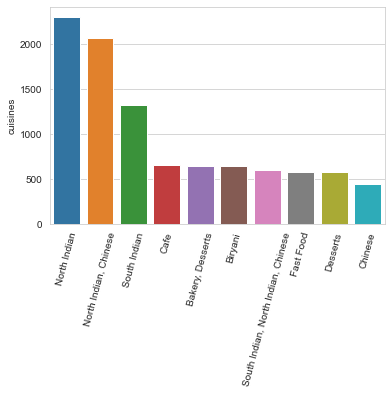

In [59]:
cusin = data.cuisines.value_counts()[0:10]
print(cusin)
sns.barplot(cusin.index,cusin)
plt.xticks(rotation=75)
plt.show()

Barplot of top 10 cuisines preffered by customers

### Check the distribution for cost of 2 people

In [60]:
data['approx_cost(for two people)'].isna().sum()

252

In [61]:
data.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)

In [62]:
data['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [63]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [64]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [65]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [66]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int32

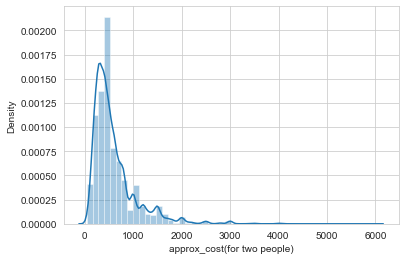

In [67]:
sns.distplot(data['approx_cost(for two people)'])



plt.show()

In [68]:
data['approx_cost(for two people)'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [ ]:
data[data['approx_cost(for two people)'] > 2000]

Distibution of cost for 2 people in resturants most of the resurants costs below Rs.1000

# Conclusions:

1. Asia Kitchen By Mainland China,Spa Cuisine,Byg Brewski Brewing Company,Punjab Grill	were the best rated Restaurants.

2. Cafe Coffee Day, Onesta, Empire Restaurant, Just Bake ,Kanti sweets were the top restaurant chains.
           
3. 64.4% of resturants accept online orders where as 35.6% donot accept online orders.

4. Based on most voted resaturants Byg Brewski Brewing Company and The Black Pearl	were the best rated restaurants.

5. Based on most voted resaturants Lazeez and Tandoor Hut were the worst rated restaurants.

6. BTM, Koramangala 5th Block has the most numbers of restaurants.

7. North Indian and Chinese were the top favourite of the people in Bangalore.

8. Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.

In [69]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list'],
      dtype='object')

# Question

Question:

Describe a function that takes 3 parameters: cost for 2 people,location and Restaurant type and return the name of resturants available at that location.

Comment below the names of restaurants that fall in Whitefield for casual dining and have cost below Rs.1000??

Best of luck!!!

In [ ]:
def return_budget(location,restaurant,x):
    budget = data[(data['approx_cost(for two people)'] <= x) & (data['location'] == location) & (data['rest_type'] == restaurant) & (data['rate'] > 4)]
    return (budget['name'].unique())

In [ ]:
return_budget('Whitefield','Casual Dining',1000)

In [ ]:
def faci():
    a